In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

plt.rcParams.update({'font.size': 14})

# Laborator 7

__Q1__. Potriviți o regresie liniară pentru setul father.son cu father.height ca și predictor pentru son.height. 

a) Dați p-value pentru panta regresiei și formulați cele două ipoteze și interpretați rezultatul testului.

b) Interpretați de asemenea și intercept-ul. Centrați x în zero, re-aplicați regresia și interpretați intercept-ul.

In [3]:
father_son = pd.read_csv('father_son.csv')
father_son.head()

,Unnamed: 0,fheight,sheight
0,1,65.04851,59.77827
1,2,63.25094,63.21404
2,3,64.95532,63.34242
3,4,65.75250,62.79238
4,5,61.13723,64.28113


In [4]:
x = father_son.fheight
y = father_son.sheight

In [5]:
xext = sm.add_constant(x)
lm = sm.OLS(y,xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('interceptul: ', beta0, 'panta: ', beta1)

interceptul:  33.88660435407799 panta:  0.5140930386233072


In [7]:
#a)
print('PValue pentru panta: ', lm.pvalues[1])
print('Ipoteza nula: nu exista corelatie(panta = 0)')
print('Ipoteza alternativa: exista corelatie(panta != 0)')
print('PValue este foarte mic => rejectam ipoteza nula => exista corelatie')

PValue pentru panta:  1.1212675496326304e-69
Ipoteza nula: nu exista corelatie(panta = 0)
Ipoteza alternativa: exista corelatie(panta != 0)
PValue este foarte mic => rejectam ipoteza nula => exista corelatie


In [8]:
#b)
print('interceptul: ', beta0)
xcentered = x - np.mean(x)
xcenteredext = sm.add_constant(xcentered)
lmcentered = sm.OLS(y,xcenteredext).fit()
beta0centered = lmcentered.params[0]
print('interceptul: ', beta0centered)
#intercept = valoarea lui y daca x = 0

interceptul:  33.88660435407799
interceptul:  68.68406965677181


__Q2__. Pentru același set father.son, preziceți înălțimea fiului dacă tatăl are înălțimea 80. Ați recomanda această predicție? Care este intervalul de confidență asociat predicției (care este intevalul de valori 95%)?

In [9]:
father_son = pd.read_csv('father_son.csv')
x = father_son.fheight
y = father_son.sheight
xext = sm.add_constant(x)
lm = sm.OLS(y,xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
x_hf = 80
y_hs = beta0 + beta1 * x_hf
n = len(x)
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))
print(y_hs)
t = stats.t.ppf(0.975, df = n - 2)
pi = t * sigma * np.sqrt(1 +1/n + (x_hf-np.mean(x))**2 / np.sum((x-np.mean(x))**2))
y_hs-pi,y_hs+pi

75.01404744394256


(70.18645536465677, 79.84163952322835)

__Q3__. Pentru setul mtcars:

a) Realizați regresia liniară pentru mpg ca și răspuns (outcome) respectiv horsepower ca și predictor. Dați interpretarea coeficienților, recentrînd x dacă e necesar. 

b) Puneți dreapta de regresie pe un scatterplot.

c) Testați ipoteza că nu există nici o corelație liniară între horsepower și mpg.

d) Ridicați un plot al reziduurilor vs. horsepower. Estimați dispersia reziduurilor direct, respectiv folosind modelul calculat.

e) Care este R-squared și ce exprimă el pentru acest caz?

In [11]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
y = mtcars.mpg
x = mtcars.hp

In [13]:
#a)
xext = sm.add_constant(x)
lm = sm.OLS(y,xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('interceptul: ', beta0, 'panta: ', beta1)

xcentered = x - np.mean(x)
xcenteredext = sm.add_constant(xcentered)
lmcentered = sm.OLS(y,xcenteredext).fit()
beta0centered, beta1centered = lmcentered.params[0], lmcentered.params[1]
print('interceptul: ', beta0centered, 'panta: ', beta1centered)

interceptul:  30.098860539622514 panta:  -0.06822827807156367
interceptul:  20.090625000000006 panta:  -0.06822827807156362


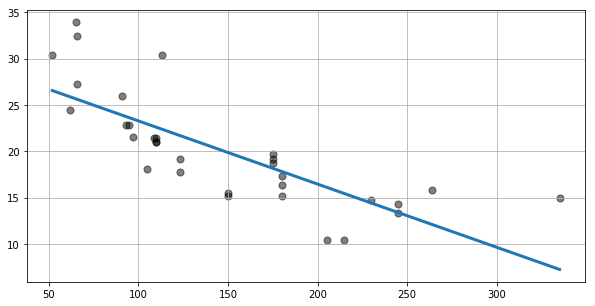

In [14]:
#b)

def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)
yf = f(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=3)
ax.grid(True); plt.show()

In [38]:
#c)
print('PValue pentru intercept: ', lm.pvalues[0])
print('PValue pentru panta: ', lm.pvalues[1])
print(np.corrcoef(x, y)[0, 1])
print('Ipoteza nula: nu exista corelatie(panta = 0)')
print('Ipoteza alternativa: exista corelatie(panta != 0)')

PValue pentru intercept:  6.64273603046494e-18
PValue pentru panta:  1.7878352541210553e-07
-0.020890925267608183
Ipoteza nula: nu exista corelatie(panta = 0)
Ipoteza alternativa: exista corelatie(panta != 0)


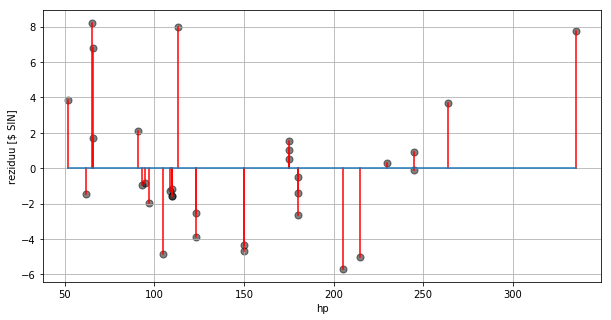

Dispersia rezidurilor:  14.922477118153394
Dispersia rezidurilor:  14.922477118153397


In [16]:
#d)
# scatter plot pentru residuals
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.set(xlabel="hp", ylabel="reziduu [$ SIN]")
ax.grid(True)
plt.show()

n = len(lm.resid)
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))
sx = np.sum((x-np.mean(x))**2)

print('Dispersia rezidurilor: ', lm.scale)
print('Dispersia rezidurilor: ', np.sum(lm.resid**2)/(n-2))


In [17]:
#e)
print('R squared: ',lm.rsquared)
#Cu cât R squared e mai mare, cu atât modelul de regresie se potriveste prezicerii

R squared:  0.6024373414239339


__Q4__. Pentru setul father.son:

a) Calculați intervalul de confidență pentru intercept și pentru slope.

b) Calculați intervalul de confidență pentru valoarea așteptată a înălțimii fiului pentru valoarea medie a înălțimii taților (confidence interval pentru linia de regresie, într-un punct dat).

c) Calculați prediction interval pentru înălțimea fiului pentru valoarea medie a înălțimii taților (confidence interval pentru predicție, într-un punct dat).

d) Puneți pe un scatter plot punctele, dreapta de regresie și intervalele de confidență pentru valoarea așteptată respectiv predicție.

In [18]:
father_son = pd.read_csv('father_son.csv')
father_son.head()
x = father_son.fheight
y = father_son.sheight
xext = sm.add_constant(x)
lm = sm.OLS(y,xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('interceptul: ', beta0, 'panta: ', beta1)

interceptul:  33.88660435407799 panta:  0.5140930386233072


In [19]:
#a)
n = len(lm.resid)
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))
sx = np.sum((x - np.mean(x))**2)
se_beta0 = np.sqrt(1/n + np.mean(x)**2 / sx) * sigma
se_beta1 = sigma / np.sqrt(sx)
i_beta0 = beta0 + np.array([-1,1]) * stats.t.ppf(0.975, df = n-2) * se_beta0
i_beta1 = beta1 + np.array([-1,1]) * stats.t.ppf(0.975, df = n-2) * se_beta1
print('Interval de confidență intercept: ', i_beta0)
print('Interval de confidență panta: ', i_beta1)

Interval de confidență intercept:  [30.29121257 37.48199614]
Interval de confidență panta:  [0.46101879 0.56716729]


In [20]:
#b)
xpct = np.mean(x)
ypct = f(xpct)
x1 = np.linspace(np.min(x),np.max(x),100)
y1 = f(x1)
t = stats.t.ppf(0.975, df = n - 2)
ci = t * sigma * np.sqrt(1/n + (xpct-np.mean(x))**2 / np.sum((x-np.mean(x))**2))
ypct-ci,ypct+ci

(68.5384554117112, 68.82968390183242)

In [21]:
#c)
pi = t * sigma * np.sqrt(1 + 1/n + (xpct-np.mean(x))**2 / np.sum((x-np.mean(x))**2))
ypct-pi,ypct+pi

(63.90091321720466, 73.46722609633896)

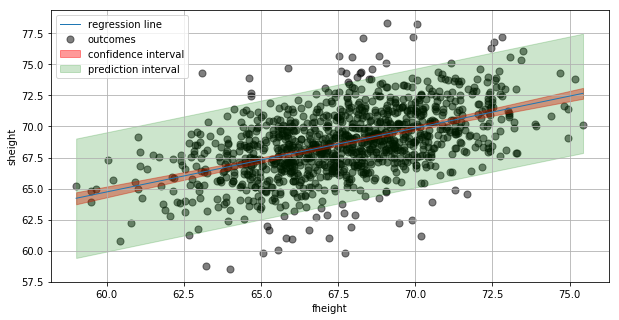

In [22]:
#d)
x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)

# t quantile
t = stats.t.ppf(0.975, df=n-2)

# dispersia reziduurilor
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=1)
ax.fill_between(x1, y1-ci, y1+ci, color='red', alpha=0.4)
ax.fill_between(x1, y1-pi, y1+pi, color='green', alpha=0.2)
ax.set(xlabel="fheight", ylabel="sheight")
ax.grid(True)
ax.legend(['regression line', 'outcomes', 'confidence interval', 'prediction interval'])
plt.show()

__Q5__. Pentru setul mtcars, realizați același lucruri ca la întrebarea anterioară.

In [23]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()
y = mtcars.mpg
x = mtcars.hp
xext = sm.add_constant(x)
lm = sm.OLS(y,xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('interceptul: ', beta0, 'panta: ', beta1)

interceptul:  30.098860539622514 panta:  -0.06822827807156367


In [24]:
#a)
n = len(lm.resid)
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))
sx = np.sum((x - np.mean(x))**2)
se_beta0 = np.sqrt(1/n + np.mean(x)**2 / sx) * sigma
se_beta1 = sigma / np.sqrt(sx)
i_beta0 = beta0 + np.array([-1,1]) * stats.t.ppf(0.975, df = n-2) * se_beta0
i_beta1 = beta1 + np.array([-1,1]) * stats.t.ppf(0.975, df = n-2) * se_beta1
print('Interval de confidență intercept: ', i_beta0)
print('Interval de confidență panta: ', i_beta1)

Interval de confidență intercept:  [26.76194879 33.43577229]
Interval de confidență panta:  [-0.08889465 -0.0475619 ]


In [25]:
#b)
xpct = np.mean(x)
ypct = f(xpct)
x1 = np.linspace(np.min(x),np.max(x),100)
y1 = f(x1)
t = stats.t.ppf(0.975, df = n - 2)
ci = t * sigma * np.sqrt(1/n + (xpct-np.mean(x))**2 / np.sum((x-np.mean(x))**2))
ypct-ci,ypct+ci

(18.69599452252757, 21.485255477472464)

In [26]:
#c)
pi = t * sigma * np.sqrt(1 + 1/n + (xpct-np.mean(x))**2 / np.sum((x-np.mean(x))**2))
ypct-pi,ypct+pi

(12.079082853388314, 28.10216714661172)

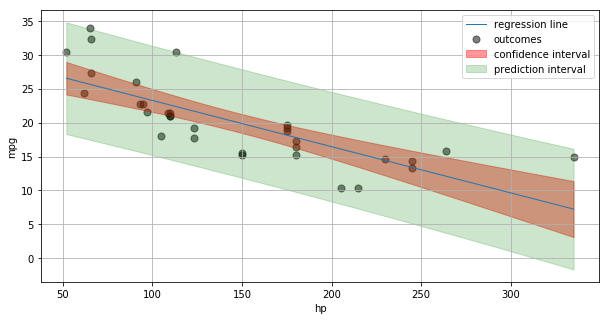

In [27]:
#d)
x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)

# t quantile
t = stats.t.ppf(0.975, df=n-2)

# dispersia reziduurilor
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=1)
ax.fill_between(x1, y1-ci, y1+ci, color='red', alpha=0.4)
ax.fill_between(x1, y1-pi, y1+pi, color='green', alpha=0.2)
ax.set(xlabel="hp", ylabel="mpg")
ax.grid(True)
ax.legend(['regression line', 'outcomes', 'confidence interval', 'prediction interval'])
plt.show()

__Q6__. Construiți două dataset-uri, y funcție de x, unul fără și altul cu variație reziduală (heteroscedasticity). x-urile vor fi comune (de exemplu, x = 1 .. 10). Mediile și dispersiile lor trebuie să fie egale. 

a) Determinați dreptele de regresie.

b) Ridicați diagrama reziduurilor.

c) Determinați R-squared.

d) Afișați intevalele de confidență pentru răspunsul așteptat (dreapta de regresie) respectiv pentru predicție.

Ce concluzii trageți?

In [28]:
#a)
x = np.random.uniform(0,10,100)
y1 = x + np.random.rand(100) - 0.5
y2 = x + (np.random.rand(100) - 0.5) * .001 * x

xext = sm.add_constant(x)

lm1 = sm.OLS(y1, xext).fit()
beta01, beta11 = lm1.params[0], lm1.params[1]
print('intercept:', beta01, 'coefficient:', beta11)

lm2 = sm.OLS(y2, xext).fit()
beta02, beta12 = lm2.params[0], lm2.params[1]
print('intercept:', beta02, 'coefficient:', beta12)


intercept: 0.01620207289376796 coefficient: 1.0004309394331417
intercept: 0.00015877166999533898 coefficient: 0.9999679907968746


In [29]:
np.mean(y1), np.mean(y2)

(4.916087010826352, 4.897776291672496)

In [30]:
np.std(y1), np.std(y2)

(2.874945497250894, 2.857060963116558)

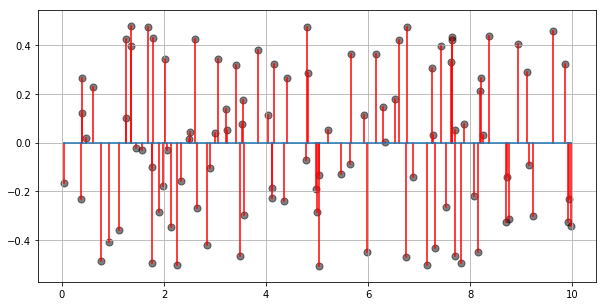

In [31]:
#b)
def f1(x):
    return beta01 + beta11 * x
def f2(x):
    return beta02 + beta12 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y = f1(x1)
yf = f1(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm1.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm1.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])

ax.grid(True)
plt.show()

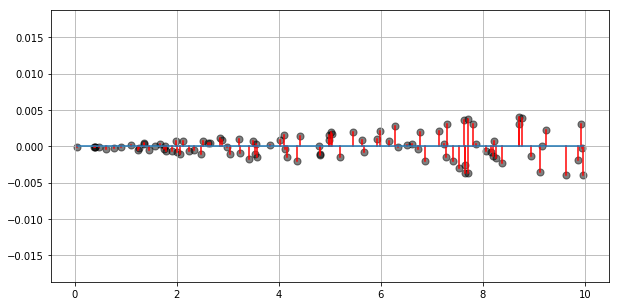

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm2.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm2.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.grid(True)
plt.show()

In [33]:
#c)
lm1.rsquared, lm2.rsquared

(0.9885113538314586, 0.9999996476664511)

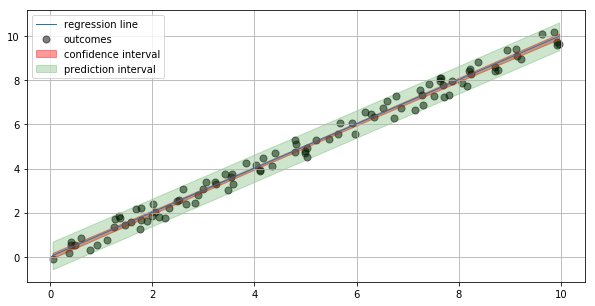

In [34]:
#d)
x1 = np.linspace(np.min(x), np.max(x), 10)
y_ = f1(x1)
n= len(lm1.resid)
# t quantile
t = stats.t.ppf(0.975, df=n-2)

# dispersia reziduurilor
sigma = np.sqrt(np.sum(lm1.resid**2)/(n-2))

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y1, c='k', alpha = .5, s=50)
ax.plot(x1, y_, lw=1)
ax.fill_between(x1, y_-ci, y_+ci, color='red', alpha=0.4)
ax.fill_between(x1, y_-pi, y_+pi, color='green', alpha=0.2)
ax.grid(True)
ax.legend(['regression line', 'outcomes', 'confidence interval', 'prediction interval'])
plt.show()

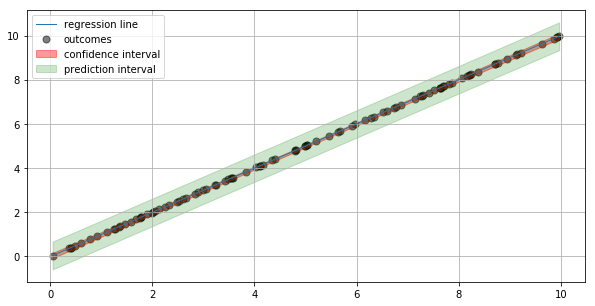

In [35]:
x1 = np.linspace(np.min(x), np.max(x), 10)
y_ = f2(x1)
n= len(lm1.resid)
# t quantile
t = stats.t.ppf(0.975, df=n-2)

# dispersia reziduurilor
sigma = np.sqrt(np.sum(lm1.resid**2)/(n-2))

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y2, c='k', alpha = .5, s=50)
ax.plot(x1, y_, lw=1)
ax.fill_between(x1, y_-ci, y_+ci, color='red', alpha=0.4)
ax.fill_between(x1, y_-pi, y_+pi, color='green', alpha=0.2)
ax.grid(True)
ax.legend(['regression line', 'outcomes', 'confidence interval', 'prediction interval'])
plt.show()